In [2]:
import numpy

### 簡単な行列の作成、確認

In [5]:
# 一次元配列を作成する
# 引数にPython標準のリストを渡す
array = numpy.array([1,2,3])
str(array)

'[1 2 3]'

In [6]:
type(array)

numpy.ndarray

In [7]:
# ndarray型がどのような構成になっているのかを調べる
array.shape

(3,)

(3,)という事は、1次元配列の3要素であるという事  
つまり  
$1 \times 3$行列ということ

In [8]:
array_2 = numpy.array([[1,2,3],[4,5,6]])
str(array_2)

'[[1 2 3]\n [4 5 6]]'

In [10]:
array_2.shape

(2, 3)

つまり  
$2\times 3$行列

### 行列の変換

In [11]:
array = numpy.array([0,1,2,3,4,5])
str(array)

'[0 1 2 3 4 5]'

reshapeメソッドに$N\times M$行列に変換するという意味で、**タプル**を渡す

In [13]:
convert_array = array.reshape((2,3))
str(convert_array)

'[[0 1 2]\n [3 4 5]]'

In [14]:
# 変換後の行列は、要素数と辻褄が合わないといけない
error_array = array.reshape((4,2))
str(error_array)

ValueError: cannot reshape array of size 6 into shape (4,2)

多次元配列を一次元配列に変換する方法は二つある  
1. ravelメソッド : 参照を返す
2. flattenメソッド : コピーを返す
  
メモリ消費を押さえたいならravelメソッド  
副作用が怖いならflattenメソッド  
という使い分けがよさそう

In [19]:
# ravelは参照を返す
origin_array = numpy.array([[1,2,3],[4,5,6]])
print(f"origin_array \n {origin_array}")

convert_array = origin_array.ravel()
print(f"convert_array \n {convert_array}")

print("===========================")

# convertの変更がoriginに影響を及ぼす
convert_array[3] = 99999

print(f"origin_array \n {origin_array}")
print(f"convert_array \n {convert_array}")

origin_array 
 [[1 2 3]
 [4 5 6]]
convert_array 
 [1 2 3 4 5 6]
origin_array 
 [[    1     2     3]
 [99999     5     6]]
convert_array 
 [    1     2     3 99999     5     6]


In [20]:
# flattenはコピーを返す
origin_array = numpy.array([[1,2,3],[4,5,6]])
print(f"origin_array \n {origin_array}")

convert_array = origin_array.flatten()
print(f"convert_array \n {convert_array}")

print("===========================")

# convertの変更がoriginに影響を及ぼさない
convert_array[3] = 99999

print(f"origin_array \n {origin_array}")
print(f"convert_array \n {convert_array}")

origin_array 
 [[1 2 3]
 [4 5 6]]
convert_array 
 [1 2 3 4 5 6]
origin_array 
 [[1 2 3]
 [4 5 6]]
convert_array 
 [    1     2     3 99999     5     6]


### データ型(dtype)
dtypeメンバにアクセスすることで、データ型を知ることが出来る

In [21]:
array = numpy.array([1,2,3])
array.dtype

dtype('int32')

In [22]:
# データ型を指定することが出来る
array = numpy.array([1,2,3],dtype=numpy.int16)
array.dtype

dtype('int16')

astypeメソッドで型変換もできる

In [24]:
array = numpy.array([1,2,3],dtype=numpy.int16)
print(array.dtype)

print(array.astype(numpy.float16).dtype)

int16
float16


### インデックスとスライス
Numpyのndarrayでは、Python標準配列と同様にインデックス指定と、スライスが使用できる

In [25]:
array = numpy.array([1,2,3])

In [26]:
array[0]

1

In [27]:
array[2]

3

In [28]:
array[99]

IndexError: index 99 is out of bounds for axis 0 with size 3

In [29]:
array[1:]

array([2, 3])

In [30]:
array[0:99]

array([1, 2, 3])

In [31]:
array[:99]

array([1, 2, 3])

In [32]:
array[-1]

3

In [33]:
array[-1:99]

array([3])

In [34]:
array_2 = numpy.array([[1,2,3],[4,5,6]])

In [35]:
array_2[0]

array([1, 2, 3])

In [36]:
array_2[3]

IndexError: index 3 is out of bounds for axis 0 with size 2

In [37]:
array_2[0][1]

2

In [42]:
# ，区切りで指定も出来る
array_2[0,1]

2

In [43]:
array_2[0,1:]

array([2, 3])

In [39]:
# すべての行を取得し、それらの3番目の要素を抽出する
array_2[:,2]

array([3, 6])

In [40]:
array_2[1,:]

array([4, 5, 6])

In [44]:
# すべての行に対して、1番目と3番目の要素を抽出する
array_2[:,[0,2]]

array([[1, 3],
       [4, 6]])

### データの再代入
インデックス指定で値を変更できる

In [45]:
array = numpy.array([1,2,3])
array_2 = numpy.array([[1,2,3],[4,5,6]])

In [46]:
array[0] = 99
str(array)

'[4 2 3]'

In [49]:
array_2[1,2] = 99
str(array_2)

'[[ 1  2  3]\n [ 4  5 99]]'

In [50]:
# 複数個まとめて変換も可能
array_2[:,0] = -99
print(array_2)

[[-99   2   3]
 [-99   5  99]]


### 深いコピー(copy)
配列を複製する時には注意しないといけないところがある。  
参照による複製と、コピーによる複製の違い。

In [52]:
array = numpy.array([1,2,3])
reference_array = array

print(array)
print(reference_array)

print("===========")
reference_array[0] = 9999

print(array)
print(reference_array)

[1 2 3]
[1 2 3]
[9999    2    3]
[9999    2    3]


上記のように、単純に代入する場合は、**参照による複製**となる  
つまり、指すアドレスは同一であるため、  
**コピー先の変更が、オリジナルに影響を及ぼしてしまう**  
  
これとは別に、コピーによる複製もある

In [53]:
array = numpy.array([1,2,3])
reference_array = array.copy()

print(array)
print(reference_array)

print("===========")
reference_array[0] = 9999

print(array)
print(reference_array)

[1 2 3]
[1 2 3]
[1 2 3]
[9999    2    3]


この場合は、  
**コピー先の変更が、オリジナルに影響を及ぼさない**  
  
代入時に、全く同じ値を持つ、別のものを作成するという事  
そのため、二つが指すアドレスは異なる

Python標準の配列のスライスはコピーが渡されるが、  
**Numpyのスライスは参照が渡される点に注意する**

In [56]:
python_array = [1,2,3]
numpy_array = numpy.array([1,2,3])

copy_py_array = python_array[::]
copy_np_array = numpy_array[::]

copy_py_array[0] = 9999
copy_np_array[0] = 9999

print(f"python_array : {python_array}\ncopy_py_array : {copy_py_array}")
print()
print(f"numpy_array : {numpy_array}\ncopy_np_array : {copy_np_array}")

python_array : [1, 2, 3]
copy_py_array : [9999, 2, 3]

numpy_array : [9999    2    3]
copy_np_array : [9999    2    3]


コピーと一口にいう場合、大体は、参照によるコピーも含まれる  
この曖昧さを避けるために、  
  
参照によるコピー : **浅いコピー(shallow copy)**  
コピーによるコピー : **深いコピー(deep copy)**
  
特別するのが一般的

### 数列を返す(arange)
Pythno標準で言うところのrangeメソッド  
numpyにもrangeのように、指定した値を自動生成するメソッドがある

In [62]:
print(list(range(10)))
print()
print(numpy.arange(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

[0 1 2 3 4 5 6 7 8 9]


In [63]:
print(list(range(1,10)))
print()
print(numpy.arange(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

[1 2 3 4 5 6 7 8 9]


In [64]:
print(type(list(range(1,10))))
print()
print(type(numpy.arange(1,10)))

<class 'list'>

<class 'numpy.ndarray'>


In [65]:
numpy.arange(1,10,2)

array([1, 3, 5, 7, 9])

### 乱数生成
Python標準のrandomよりも、Numpyのrandomの方が、高速で強力な乱数を生成できる  
具体的には$N\times M$行列を乱数で埋めるという事が出来る

In [68]:
# N Mをタプルで指定して、乱数で埋めた行列を生成する
# 実行の度に異なる値が生成される
random_array = numpy.random.random((3,2))
random_array

array([[0.40532172, 0.02859866],
       [0.16785248, 0.66684003],
       [0.78899653, 0.546466  ]])

In [71]:
# シード値を指定すれば、生成される乱数は毎回同じになる
numpy.random.seed(0)
random_array = numpy.random.random((3,2))
random_array

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [74]:
# randでも似たようなことが出来るが、引数が異なる
random_array = numpy.random.rand(3,2)
random_array

array([[0.77815675, 0.87001215],
       [0.97861834, 0.79915856],
       [0.46147936, 0.78052918]])

In [76]:
# 任意範囲の整数を生成することも出来る
random_int = numpy.random.randint(1,10)
random_int

1

In [78]:
# 任意範囲の整数で行列も作れる
random_int_array = numpy.random.randint(1,10,(2,3))
random_int_array

array([[8, 3, 1],
       [1, 5, 6]])

In [82]:
# 任意範囲の小数込みで行列を作れる
# 第一、第二引数はデフォルトでは0,1 0以上1未満
random_float_array = numpy.random.uniform(1,10,size=(2,3))
random_float_array

array([[4.94741362, 9.89536454, 1.9184033 ],
       [2.8798908 , 2.45178566, 6.87797493]])

上記で出てきた  
* random
* rand
* randint
* uniform
  
これらは、**一様分布**に従って、現れる乱数である  
指定した範囲内のどれもが、同程度の確率で現れる乱数である  
  
一方で、**正規分布に従う乱数の生成も可能**である

In [84]:
# randnは標準正規分布に従うN M行列を生成する
random_array = numpy.random.randn(2,3)
random_array

array([[-0.30736481, -0.36652394,  1.11971196],
       [-0.45792242,  0.4253934 , -0.02797118]])

In [88]:
# normalでは、平均、標準偏差、サイズを指定して正規分布に従う乱数を生成する
random_array = numpy.random.normal(10,3,size=(2,3))
random_array

array([[ 7.02729015, 13.05364015, 11.02476219],
       [ 6.24734135, 12.77575226,  7.28564153]])

### 同じ要素の数列を作る
例えば、初期化等で0埋めがしたいときなどに使える

In [89]:
# zerosで0埋めが出来る
zero_array1 = numpy.zeros(3)
zero_array2 = numpy.zeros((2,3))

print(zero_array1)
print()
print(zero_array2)

[0. 0. 0.]

[[0. 0. 0.]
 [0. 0. 0.]]


In [90]:
# onesで1埋めが出来る
one_array1 = numpy.ones(3)
one_array2 = numpy.ones((2,3))

print(one_array1)
print()
print(one_array2)

[1. 1. 1.]

[[1. 1. 1.]
 [1. 1. 1.]]


### 単位行列を作る
Numpyなら簡単に単位行列を作成することが出来る

In [92]:
identity_matrix = numpy.eye(3)
identity_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 指定した値で埋める

In [94]:
full_array = numpy.full(3,999)
full_array

array([999, 999, 999])

In [95]:
full_array = numpy.full((3,5),999)
full_array

array([[999, 999, 999, 999, 999],
       [999, 999, 999, 999, 999],
       [999, 999, 999, 999, 999]])

In [97]:
# ついでにNumpyが用意しているpiメンバを使って埋める
pi_array = numpy.full((3,5),numpy.pi)
pi_array

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265]])

### nan
Numpyでは欠損値を意味するものとして**nan**が用意されている  
Not a Numberの略  
  
数値ではないという事を示すが、データ型としては一応floatに分類される  
PythonのNoneや空文字が入ると行列演算ができなくなるため、とりあえずの間埋めとして、nanが用意されている

In [98]:
numpy.nan

nan

In [102]:
# nanはfloatに分類されるため、型合わせのために他の数字もfloatになる
include_nan = numpy.array([1,2,numpy.nan])
print(include_nan)

normal_array = numpy.array([4,5,6])

print(include_nan + normal_array)

[ 1.  2. nan]
[ 5.  7. nan]


### 範囲指定で均等割りデータを作る
始まりと終わりと、区切りを指定して、その間を等分割する数列を作成することが出来る

In [103]:
# 1～10を5分割する
numpy.linspace(1,10,5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [106]:
# arangeでも同様の事が出来る
# ただし、linspaceの方が直感的
numpy.arange(1,11,2.25)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [107]:
# 例えばsinグラフを描く場合の、各点を生成したいときに便利
numpy.linspace(0,numpy.pi,20)

array([0.        , 0.16534698, 0.33069396, 0.49604095, 0.66138793,
       0.82673491, 0.99208189, 1.15742887, 1.32277585, 1.48812284,
       1.65346982, 1.8188168 , 1.98416378, 2.14951076, 2.31485774,
       2.48020473, 2.64555171, 2.81089869, 2.97624567, 3.14159265])

### 要素間の差分を計算する

In [108]:
# 右隣の要素との差分を算出する
# 右側 - 左側
array = numpy.array([2,2,6,1,3])
numpy.diff(array)

array([ 0,  4, -5,  2])

### 連結

In [109]:
array1 = numpy.array([1,2,3])
array2 = numpy.array([4,5,6])

numpy.concatenate([array1,array2])

array([1, 2, 3, 4, 5, 6])

In [110]:
array1 = numpy.array([[1,2,3],[4,5,6]])
array2 = numpy.array([[4,5,6],[1,2,3]])

# 2次元配列の場合、軸(axis)をもう一軸増やす必要がある
numpy.concatenate([array1,array2],axis=1)

array([[1, 2, 3, 4, 5, 6],
       [4, 5, 6, 1, 2, 3]])

In [111]:
array1 = numpy.array([[1,2,3],[4,5,6]])
array2 = numpy.array([[4,5,6],[1,2,3]])

numpy.concatenate([array1,array2])

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [1, 2, 3]])

In [113]:
array1 = numpy.array([[1,2,3],[4,5,6]])
array2 = numpy.array([[4,5,6],[1,2,3]])

# hstackで同様の事が出来る
# h方向(横方向)に要素を追加という事
numpy.hstack([array1,array2])

array([[1, 2, 3, 4, 5, 6],
       [4, 5, 6, 1, 2, 3]])

In [114]:
array1 = numpy.array([[1,2,3],[4,5,6]])
array2 = numpy.array([[4,5,6],[1,2,3]])

# v方向(縦方向)に要素を追加するならvstack
numpy.vstack([array1,array2])

array([[1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [1, 2, 3]])

### 分割
n次元配列を途中で分割して、n次元配列をm個作るようなこともNumpyならできる

In [115]:
array = numpy.array([[1,2,3],[4,5,6]])
# 分割する行列と、分割線の位置をリストで渡す
# 今回の場合、横方向(h方向)2列目で分割
numpy.hsplit(array,[2])

[array([[1, 2],
        [4, 5]]),
 array([[3],
        [6]])]

In [125]:
array = numpy.array([[1,2,3],[4,5,6]])
# 今回の場合、横方向(h方向)1,2列目で分割
numpy.hsplit(array,[1,2])

[array([[1],
        [4]]),
 array([[2],
        [5]]),
 array([[3],
        [6]])]

In [127]:
array = numpy.array([[1,2,3],[4,5,6],[7,8,9]])
# もちろん縦分割も可能
numpy.vsplit(array,[1])

[array([[1, 2, 3]]),
 array([[4, 5, 6],
        [7, 8, 9]])]

In [128]:
array = numpy.array([[1,2,3],[4,5,6],[7,8,9]])
numpy.vsplit(array,[1,2])

[array([[1, 2, 3]]), array([[4, 5, 6]]), array([[7, 8, 9]])]

### 転置
行と列を入れ替える事を転置という

In [130]:
array = numpy.array([[1,2,3],
                     [4,5,6]])

# Tメンバにアクセスすることで転置行列が得られる
array.T

array([[1, 4],
       [2, 5],
       [3, 6]])

### 次元追加

In [132]:
array = numpy.array([1,2,3])

In [133]:
# 行方向に新しい次元を追加する
array[numpy.newaxis,:]

array([[1, 2, 3]])

In [134]:
# 列方向に新しい次元を追加する
array[:,numpy.newaxis]

array([[1],
       [2],
       [3]])

reshapeで次元変更を行えるが、numpy.newaxisを用いる方法は、次元数の入力がいらないという点で便利

### グリッドデータの生成
meshgridメソッドは、2次元上の点に対応する等高線、ヒートマップの作製に便利

In [138]:
x = numpy.arange(0,4)
y = numpy.arange(4,7)

print(x)
print(y)

[0 1 2 3]
[4 5 6]


In [139]:
xx,yy = numpy.meshgrid(x,y)

print(xx)
print(yy)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
[[4 4 4 4]
 [5 5 5 5]
 [6 6 6 6]]


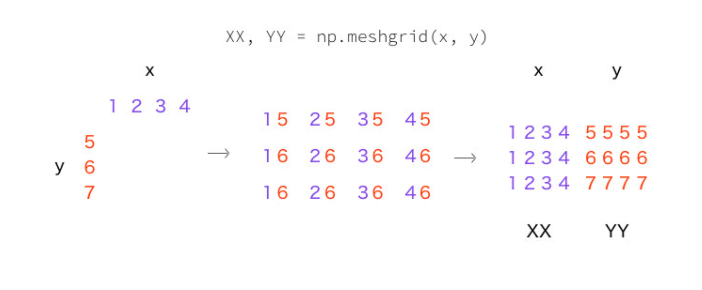  
要するにこういう事を行いたい  